In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,0,0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,0,0
2023-02-23 00:00:00-05:00,4018.600098,4028.300049,3969.189941,4012.320068,3952940000,0,0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-02-13 00:00:00-05:00', '2023-02-14 00:00:00-05:00',
               '2023-02-15 00:00:00-05:00', '2023-02-16 00:00:00-05:00',
               '2023-02-17 00:00:00-05:00', '2023-02-21 00:00:00-05:00',
               '2023-02-22 00:00:00-05:00', '2023-02-23 00:00:00-05:00',
               '2023-02-24 00:00:00-05:00', '2023-02-27 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23903, freq=None)

<AxesSubplot:xlabel='Date'>

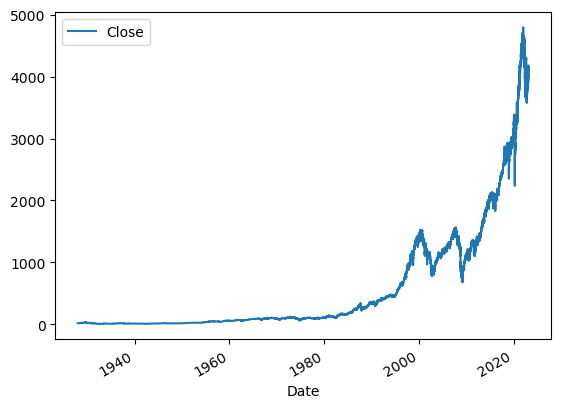

In [6]:
sp500.plot.line(y="Close", use_index=True)

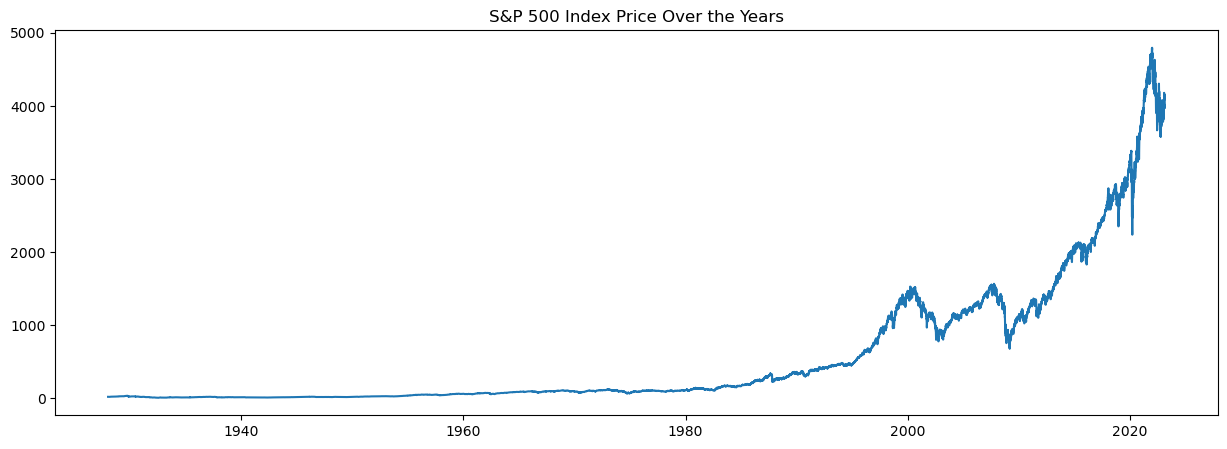

In [7]:
plt.figure(figsize=(15,5))
plt.title('S&P 500 Index Price Over the Years')
plt.plot(sp500.index, sp500['Close'])
plt.savefig('sp500.svg')
plt.show()

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

### Setting the target

While in the previous model, we attempted to predict the price of the index, it would have perhaps been better to focus on the directionality of the stock rather than something so specific.

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [11]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [12]:
sp500['Target']

Date
1927-12-30 00:00:00-05:00    1
1928-01-03 00:00:00-05:00    0
1928-01-04 00:00:00-05:00    0
1928-01-05 00:00:00-05:00    1
1928-01-06 00:00:00-05:00    0
                            ..
2023-02-21 00:00:00-05:00    0
2023-02-22 00:00:00-05:00    1
2023-02-23 00:00:00-05:00    0
2023-02-24 00:00:00-05:00    1
2023-02-27 00:00:00-05:00    0
Name: Target, Length: 23903, dtype: int64

In [13]:
sp500 = sp500.loc["1990-01-01":].copy()

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049,0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1
2023-02-23 00:00:00-05:00,4018.600098,4028.300049,3969.189941,4012.320068,3952940000,3970.040039,0


### Initial Model Building

To begin the initial model building process, we will be using a Random Forest Classifier. This is for a number of reasons. The first is to do with the fact that Random Forests, and ensemble methods such as Bagging, are resistant to overfitting. Additionally, Random Forests are able to find non-linear relationships in the data. In this instance, we do not want the model to assume some sort of linear relationship between the open price and the target. Other considerations include the speed of implementation.

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               min_samples_split=100, 
                               random_state=1)

While in other machine learning projects, we could use cross-validation to improve our models, cross-validation when working with time-series data results in data leakage.

In [16]:
# simple train, test split
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

X_train = train[predictors]
y_train = train["Target"]

X_test = test[predictors]
y_test = test["Target"]

model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
from sklearn.metrics import precision_score

preds = model.predict(X_test)

precision_score(test["Target"], preds)

0.352112676056338

<AxesSubplot:xlabel='Date'>

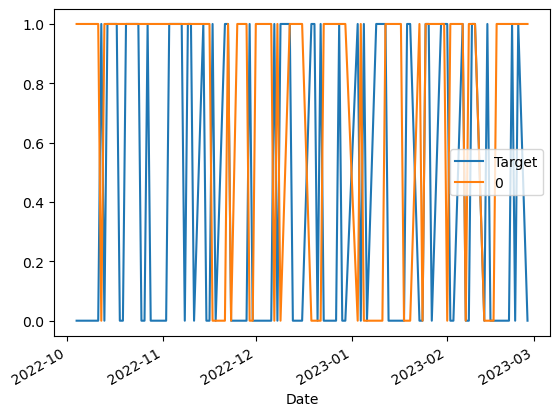

In [18]:
import pandas as pd

preds = pd.Series(preds, index=test.index)
combined = pd.concat([y_test, preds], axis=1)
combined.plot()

### Building a Backtesting System

In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [20]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i: i + step].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [21]:
predictions = backtest(sp500, model, predictors)

In [22]:
predictions

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2023-02-21 00:00:00-05:00,0,1
2023-02-22 00:00:00-05:00,1,1
2023-02-23 00:00:00-05:00,0,1


In [23]:
predictions["Predictions"].value_counts(normalize=True)

0    0.58107
1    0.41893
Name: Predictions, dtype: float64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5277324632952691

In [25]:
predictions["Target"].value_counts(normalize=True)

1    0.533743
0    0.466257
Name: Target, dtype: float64

The predictions value is showing the percentage of times that the model predicted either a rise or fall in the stock price. The precision score showed that the model was right 52.8% of the time. Hoever, this number needs to be taken in the context of general trends. Looking at the percentage of times the index price increased, we see that assuming the price would always increase would have resulted in an accuracy of 53.4% - an improvement on our base line model. 

To improve our predictions, we are able to add alternate predictors to our model.

### Adding Additional Predictors

In [45]:
# adding moving averages
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [46]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14 00:00:00-05:00,4126.700195,4159.770020,4095.010010,4136.129883,3929200000,4147.600098,1,0.999860,1.0,1.005710,2.0,1.040242,27.0,1.025586,111.0,1.126130,535.0
2023-02-15 00:00:00-05:00,4119.500000,4148.109863,4103.979980,4147.600098,4075980000,4090.409912,0,1.001385,1.0,1.007042,3.0,1.042248,28.0,1.028764,111.0,1.128837,536.0
2023-02-16 00:00:00-05:00,4114.750000,4136.540039,4089.489990,4090.409912,4143660000,4079.090088,0,0.993058,1.0,0.992727,3.0,1.027339,27.0,1.014871,111.0,1.112876,536.0


In [48]:
# removing na values
sp500 = sp500.dropna()

In [49]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


In [50]:
model = RandomForestClassifier(
    n_estimators=200, 
    min_samples_split=50, 
    random_state=1
)

In [53]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    # predicts probability of target
    preds = model.predict_proba(test[predictors])[:,1]
    # we can increase our certainty in a price increase by changing the
    # threshold from 0.5 to 0.6
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

When we rerun our backtest and calculate the new predictions, we wil use the new predictors. You will notice that these no longer include the predcitors used in our previous model. This is because absolute values are not particularly indicative of changes, whereas ratios are. A model is unable to gain much information on whether a to predict an increase or decrease based on these absolute values.

In [54]:
predictions = backtest(sp500, model, new_predictors)

In [55]:
predictions["Predictions"].value_counts()

0.0    4035
1.0     813
Name: Predictions, dtype: int64

Given our threshold and the changed predictors, we see that the model now predicts a downturn far more often than an upturn.

In [56]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495

### Summary and Next Steps

While we were able to improve the model and beat the base probability, there are still other factors that we can and should consider. For example, while the S&P only operates during U.S. market hours, other indexes open before and close after. We could append this information to the data and see whether there is any correlation between these variables. You can also add in news - macroeconomic news such as inflation, interest rates, and so on. You could also add in key components of the S&P itself - i.e. if tech is in a downturn, will this have lead to a downturn in the S&P at some point in the future? We can also look at a higher resolution of S&P data - hourly or minute by minute.

### Adding Other Data